In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

#Image classification with "CIFAR10" dataset.

In [10]:
(X_train, y_train), (X_test, y_test)= datasets.cifar10.load_data()
X_train.shape
X_test.shape

(10000, 32, 32, 3)

In [15]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse', 'ship', 'truck']

In [22]:
def plot_images(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

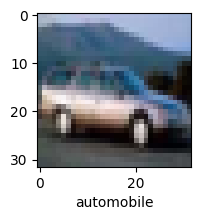

In [26]:
plot_images(X_train, y_train, 4)

In [27]:
X_train = X_train / 255
X_test = X_test / 255

In [28]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 145s 92ms/step - loss: 1.8091 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 173s 111ms/step - loss: 1.6243 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 203s 130ms/step - loss: 1.5423 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 187s 120ms/step - loss: 1.4800 - accuracy: 0.4784
Epoch 5/5
1563/1563 [==============================] - 178s 114ms/step - loss: 1.4334 - accuracy: 0.4976


In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 11s 33ms/step - loss: 1.4890 - accuracy: 0.4724


[1.4889733791351318, 0.4724000096321106]

In [31]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.65      0.56      1000
           1       0.45      0.79      0.57      1000
           2       0.43      0.23      0.30      1000
           3       0.29      0.53      0.37      1000
           4       0.59      0.21      0.31      1000
           5       0.43      0.31      0.36      1000
           6       0.54      0.47      0.50      1000
           7       0.60      0.48      0.53      1000
           8       0.63      0.57      0.60      1000
           9       0.55      0.49      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [33]:
cnn = models.Sequential([

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [34]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 71s 44ms/step - loss: 1.5042 - accuracy: 0.4587
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1604 - accuracy: 0.5951
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0263 - accuracy: 0.6437
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9437 - accuracy: 0.6718
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8819 - accuracy: 0.6964
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8325 - accuracy: 0.7112
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7907 - accuracy: 0.7241
Epoch 8/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7515 - accuracy: 0.7382
Epoch 9/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7214 - accuracy: 0.7485
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [36]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9437 - accuracy: 0.6871


[0.943710446357727, 0.6870999932289124]

In [37]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

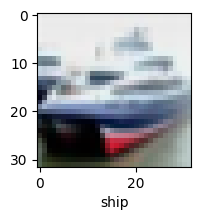

In [38]:
plot_images(X_test, y_test, 1)

In [40]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[1.1238057e-02, 2.6682456e-04, 3.8549751e-03, 9.2955905e-01,
        2.4150636e-03, 1.9957164e-02, 5.9728515e-03, 4.7125436e-06,
        2.6677096e-02, 5.4052794e-05],
       [2.0376725e-01, 1.5802228e-01, 7.8277255e-05, 2.7477141e-05,
        6.5375311e-06, 3.8973008e-07, 4.6612013e-06, 1.2568894e-07,
        6.3042396e-01, 7.6690363e-03],
       [3.0248474e-02, 2.5778168e-01, 1.2249516e-04, 1.5508145e-03,
        3.1545328e-04, 1.2362956e-04, 4.6877682e-04, 8.3317755e-06,
        6.7684913e-01, 3.2531168e-02],
       [8.7720060e-01, 3.1430472e-02, 2.6265131e-03, 1.4642076e-04,
        5.8947969e-04, 6.9031739e-07, 4.8891845e-04, 3.1323307e-07,
        8.7026879e-02, 4.8958219e-04],
       [1.6657673e-04, 4.0717339e-05, 3.2784924e-02, 7.1948660e-03,
        1.7179449e-01, 5.8652012e-04, 7.8739333e-01, 7.1776808e-06,
        3.0965955e-05, 3.7360371e-07]], dtype=float32)

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

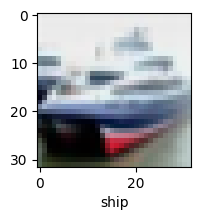

In [43]:
plot_images(X_test, y_test, 1)

In [44]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [49]:
classes[y_classes[0]]

'cat'

In [50]:
print("CLassification Report: \n", classification_report(y_test, y_classes))

CLassification Report: 
               precision    recall  f1-score   support

           0       0.65      0.79      0.71      1000
           1       0.81      0.80      0.80      1000
           2       0.57      0.58      0.57      1000
           3       0.53      0.50      0.52      1000
           4       0.63      0.65      0.64      1000
           5       0.68      0.48      0.56      1000
           6       0.78      0.74      0.76      1000
           7       0.77      0.71      0.74      1000
           8       0.74      0.83      0.78      1000
           9       0.72      0.80      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

